In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
%matplotlib inline


In [229]:
df= pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [230]:
df.isna().sum()
df.dropna(inplace=True)

In [231]:
df["Weight_zscore"]=(df.Weight-df.Weight.mean()/df.Weight.std())
df=df[df["Weight_zscore"]>3]
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Weight_zscore
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,240.887289
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,288.887289
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,338.887289
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,361.887289
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,428.887289
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,11.087289
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,12.287289
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,11.087289
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,18.587289


# Data exploration :

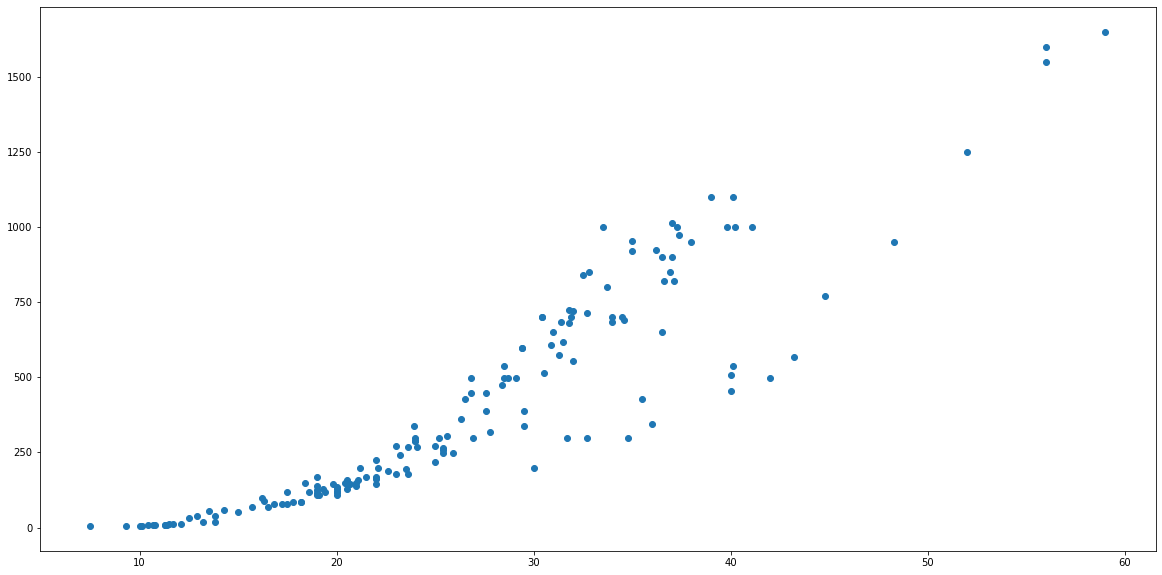

In [232]:
plt.figure(figsize=(20, 10))
plt.scatter(df["Length1"], df["Weight_zscore"])
plt.show()

# Data extraction : 

In [233]:
# y = e^x + b
df["Length1"] = df["Length1"].astype(float)
df["Weight"] = df["Weight"].astype(float)

In [238]:
x = df.iloc[:,2]
y =df.iloc[:,7]

In [239]:
# def convert_to_floats(rows):
#     """convert a list of string tuples to a  ndarray of floats"""

#     # create a a result list ( later to be converted to np array matrix)
#     result = []
#     # To-Do Loop through the list and convert row by row
#     for row in rows:

#        value = np.asarray(row)
#        value = value.astype(np.float)

#        result.append(value)  # Vstack means we are adding a row

#     return np.array(result)

In [240]:
value_x=np.array(x)
value_x
value_x=value_x.reshape(-1,1)
value_x


array([[23.2],
       [24. ],
       [23.9],
       [26.3],
       [26.5],
       [26.8],
       [26.8],
       [27.6],
       [27.6],
       [28.5],
       [28.4],
       [28.7],
       [29.1],
       [29.5],
       [29.4],
       [29.4],
       [30.4],
       [30.4],
       [30.9],
       [31. ],
       [31.3],
       [31.4],
       [31.5],
       [31.8],
       [31.9],
       [31.8],
       [32. ],
       [32.7],
       [32.8],
       [33.5],
       [35. ],
       [35. ],
       [36.2],
       [37.4],
       [38. ],
       [12.9],
       [16.5],
       [17.5],
       [18.2],
       [18.6],
       [19.1],
       [19.4],
       [20.4],
       [20.5],
       [20.5],
       [21. ],
       [21.1],
       [22. ],
       [22. ],
       [22.1],
       [23.6],
       [24. ],
       [25. ],
       [29.5],
       [23.6],
       [24.1],
       [25.6],
       [28.5],
       [33.7],
       [37.3],
       [13.5],
       [14.3],
       [16.3],
       [17.5],
       [18.4],
       [19. ],
       [19

In [241]:
value_y=np.array(y)
value_y
value_y=value_y.reshape(-1,1)


# Model building :

In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
from sklearn.preprocessing import PolynomialFeatures


In [255]:
poly = PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(value_x)

In [256]:
poly.fit(x_poly, value_y)

PolynomialFeatures(degree=3)

In [257]:
linreg=LinearRegression()


In [258]:
linreg.fit(x_poly, value_y)

LinearRegression()

In [259]:
y_pred=linreg.predict(x_poly)

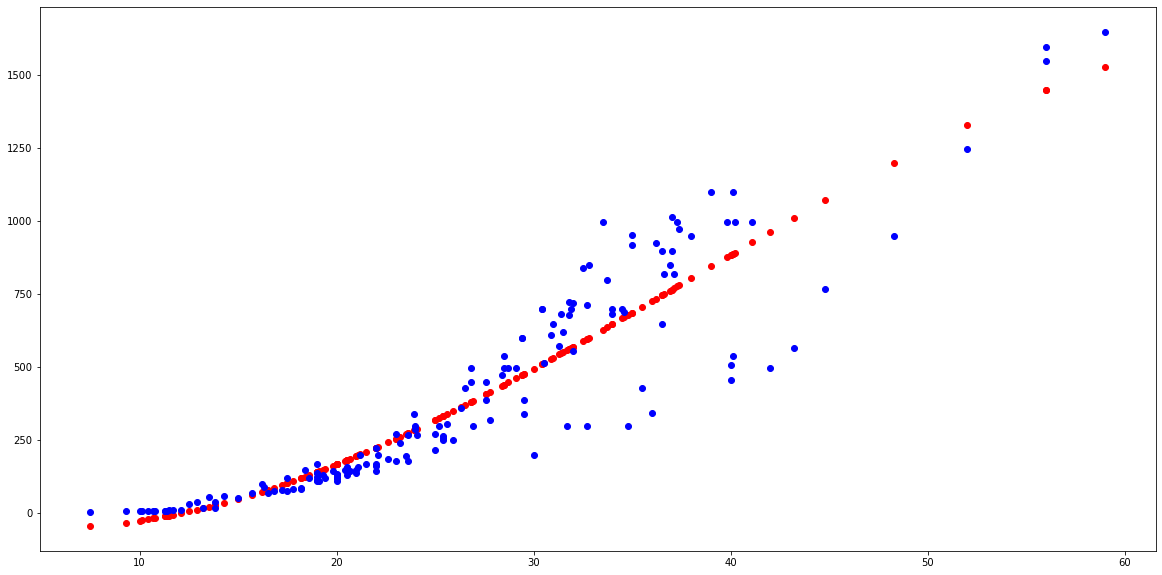

In [267]:

plt.figure(figsize=(20, 10))
plt.scatter(value_x, y_pred, color='red')
plt.scatter(value_x, value_y, color='blue')
plt.show()


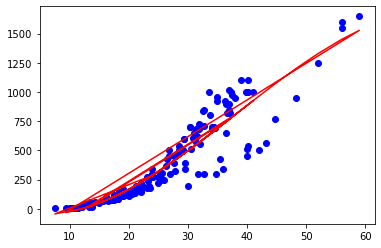

In [269]:
plt.plot(value_x, y_pred,color="red")
plt.scatter(value_x,value_y,color="blue")

In [262]:
linreg.coef_

array([[ 0.00000000e+00, -1.44962264e+01,  1.41461834e+00,
        -1.23236569e-02]])

In [263]:
linreg.intercept_

array([-10.12784788])

In [264]:
from sklearn.metrics import r2_score


In [265]:
r2_score(value_x, y_pred)

-2422.645068754493